# Final Project

# Analysis of factors contributing to house price</span>



* **Name**: Koki Hayashi</span>
* **Student number**: 0400377291</span>

<br>

### Purpose:

* The purpose of this Final Project is to determine the factors that contribute to house price.
* The key **dependent variables**(DV) is house price of unit area, (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)
* Key **independent variables** (IVs) include:
  * the transaction date
  * the house age
  * the distance to the nearest MRT station
  * the number of convenience stores in the living circle on foot
  * latitude
  * longitude
* This dataset includes 414 cases (i.e., 414 different real estates), each with 6 features.

### Dataset source:

The data come from the [Real Estate Valuation](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set) dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php):

The data are available for download [here](https://archive.ics.uci.edu/static/public/477/real+estate+valuation+data+set.zip).

___

## Descriptive Statistics

To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

In [1]:
%%capture
%run descriptive.ipynb

In [2]:
display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,price,age,from station,number of convenience stores
mean,37.98,17.713,1083.885689,4.094
median,38.45,16.100,492.231300,4.000
mode,24.70,0.000,289.324800,0.000


<br>

Let's repeat for a dispersion table:

</br>

In [3]:
display_dispersion_table(num=2)

<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,price,age,from station,number of convenience stores
st.dev.,13.59,11.379,1260.584387,2.942
min,7.60,0.000,23.382840,0.000
max,117.50,43.800,6488.021000,10.000
range,109.90,43.800,6464.638160,10.000
25th,27.70,9.025,289.324800,1.000
75th,46.60,28.150,1454.279000,6.000
IQR,18.90,19.125,1164.954200,5.000


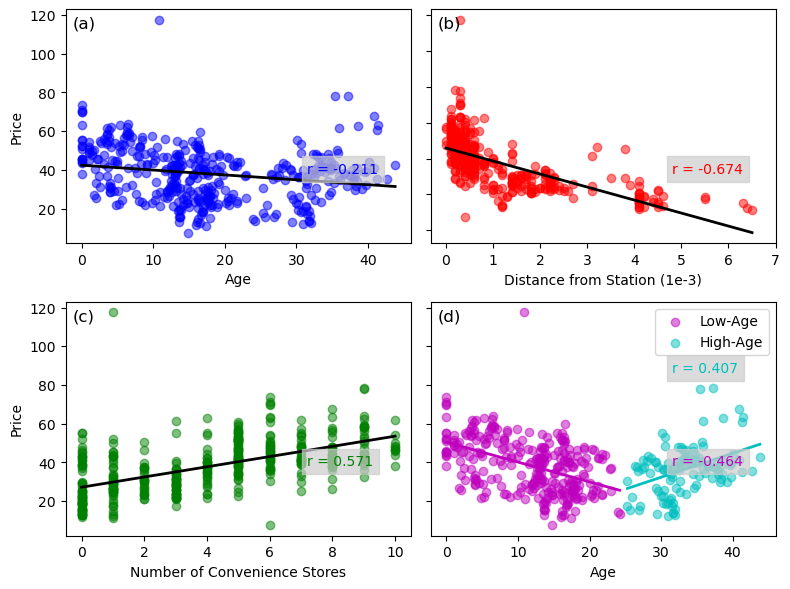

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

In [4]:
plot_descriptive()

___

## Classical Statistics

This investigates whether having a "High" number of convenience stores (7-10) results in significantly higher prices compared to a "Medium" number of stores (3-6).

In [5]:
import classical as cls

t_high_med, p_high_med = cls.compute_ttest_1()

print(float(t_high_med))
print(float(p_high_med))

4.967395256723803
1.329755471827907e-06


The resulting $p$-value ($1.33 \times 10^{-6}$) is significantly less than the $\alpha$ level of $0.05$, leading to the rejection of the null hypothesis. A statistically significant price difference exists between the "High Convenience" (7-10 stores) group and the "Medium Convenience" (3-6 stores) group. This finding indicates that, contrary to expectation, having 7 to 10 nearby stores still adds tangible value to the property price compared to having 3 to 6 stores, suggesting the market's demand for convenience has not yet reached its limit.<br>


___

This compares the prices of "Old but Convenient" houses (Age > 20 years, DistMRT < 500m) against "New but Inconvenient" houses (Age < 10 years, DistMRT > 1500m). This insight reveals which factor dominates the valuation: location or building age.

In [6]:
t_oldNear_newFar, p_oldNear_newFar = cls.compute_ttest_2()

print(float(t_oldNear_newFar))
print(float(p_oldNear_newFar))

9.402888277034172
2.6257515494450012e-14


The extremely low $p$-value ($\approx 2.63 \times 10^{-14}$) is far below $0.05$, confirming a highly significant difference in price between the two groups. With the mean price of "Old but Convenient" properties ($\approx 42.35$) being substantially higher than "New but Inconvenient" properties ($\approx 28.32$), this finding statistically supports the conclusion that Location is the dominant valuation factor over house age.
<br>
<br>

___

## Machine learning

We focus on a one-feature regression problem in order
to clearly visualize the model behavior and validation results.

We fit an SVR model to the training data and predict house prices over some variables.  

The plots below show:
- Training data (scatter points)
- Test data (scatter points)
- SVR predicted curve (red line & green line)

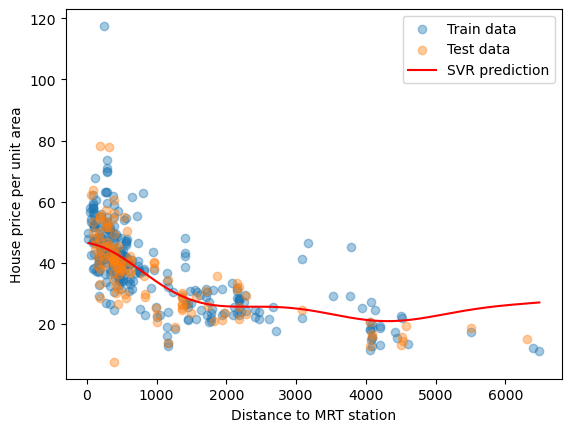

In [7]:
import pandas as pd
from machine import svr_1d_plot

df = pd.read_csv("Real estate valuation data set.csv")

result_X1 = svr_1d_plot(
    df=df,
    x_col="X3 distance to the nearest MRT station",
    y_col="Y house price of unit area",
    x_label="Distance to MRT station",
    color="red"
)

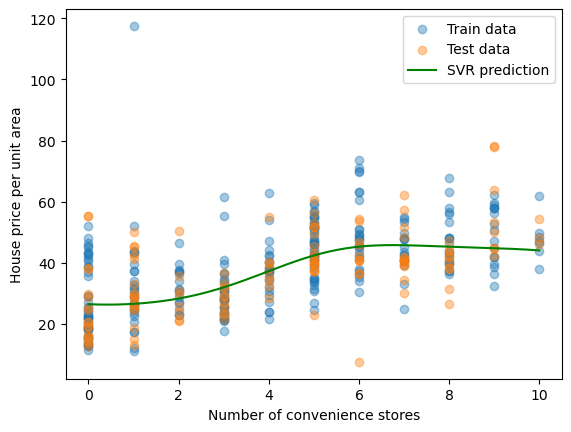

In [8]:
result_X2 = svr_1d_plot(
    df=df,
    x_col="X4 number of convenience stores",
    y_col="Y house price of unit area",
    x_label="Number of convenience stores",
    color="green"
)


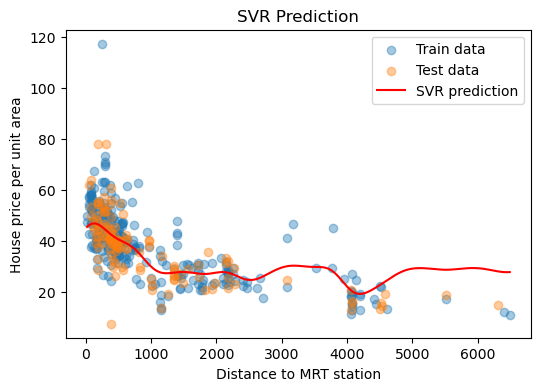

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from improved import svr_model, X_train, X_test, y_train, y_test, predict_svr, gamma_validation

x_plot = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
y_plot = predict_svr(svr_model, x_plot)

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, alpha=0.4, label="Train data")
plt.scatter(X_test, y_test, alpha=0.4, label="Test data")
plt.plot(x_plot, y_plot, color="red", label="SVR prediction")
plt.xlabel("Distance to MRT station")
plt.ylabel("House price per unit area")
plt.legend()
plt.title("SVR Prediction")
plt.show()

## Validation

The following plot shows the effect of the RBF kernel's `gamma` parameter on validation performance:  
- Blue curve: Validation MSE over a dense range of gamma values  
- Dotted vertical lines: Candidate gamma values we considered

Observations:
- Very small gamma values underfit the data (high MSE)  
- Very large gamma values overfit the data (also high MSE)  
- Intermediate gamma values achieve the lowest validation MSE, indicating the best generalization

This gamma validation supports the selection of a suitable gamma value for the SVR model.


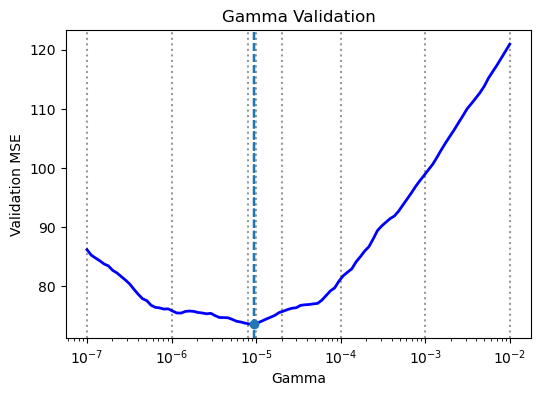

In [10]:
gamma_dense, mse_dense, gamma_points, best_gamma, best_mse = gamma_validation(X_train, y_train, X_test, y_test)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(gamma_dense, mse_dense, lw=2, color="blue")
ax.scatter(best_gamma, best_mse, zorder=5)
for g in gamma_points:
    ax.axvline(g, linestyle='dotted', color='k', alpha=0.4)
    ax.axvline(best_gamma, linestyle='--', alpha=0.8)

ax.set_xscale("log")
ax.set_xlabel("Gamma")
ax.set_ylabel("Validation MSE")
ax.set_title("Gamma Validation")
plt.show()